<a href="https://colab.research.google.com/github/vnsh69/CNN/blob/main/training_fasion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install opendatasets
import opendatasets as od

In [27]:
od.download("https://www.kaggle.com/datasets/zalando-research/fashionmnist/data")

Skipping, found downloaded files in "./fashionmnist" (use force=True to force download)


In [28]:
import numpy as np
import pandas as pd
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
import tensorflow as tf

In [29]:
data = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [30]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

### the image size is 28x28 and its grayscale

In [31]:
col = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [32]:
label = data['label']
data.drop(columns=['label'], inplace=True)
label.head()

,label
0,2
1,9
2,6
3,0
4,3


In [33]:
label.shape

(60000,)

In [34]:
y_test = test['label']
x_test = test.drop(columns=['label'])

In [35]:
y_test.shape

(10000,)

In [36]:
# Convert the dataframe to a NumPy array
image_array = data.to_numpy()

image_size = 28
image_tensor = tf.convert_to_tensor(image_array.reshape(-1, image_size, image_size), dtype=tf.float32)


In [37]:
image_array_test = x_test.to_numpy()
image_tensor_test = tf.convert_to_tensor(image_array_test.reshape(-1, image_size, image_size), dtype=tf.float32)

In [38]:
# Normalize values to [0,1] for TensorFlow processing
image_tensor = image_tensor / 255.0
image_tensor_test = image_tensor_test / 255.0

In [39]:
image_tensor.shape

TensorShape([60000, 28, 28])

In [40]:
x_train = np.expand_dims(image_tensor,-1)
x_test = np.expand_dims(image_tensor_test,-1)
x_train.shape

(60000, 28, 28, 1)

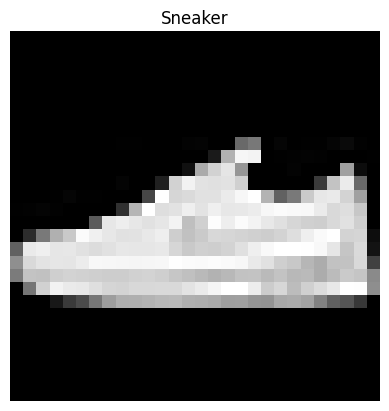

In [41]:
import matplotlib.pyplot as plt

from random import randrange
index = randrange(60000)

# Convert a single image to NumPy for visualization
sample_image = image_tensor[index].numpy()
name = label[index]

# Plot the image
plt.imshow(sample_image, cmap="gray")
plt.axis("off")
plt.title(f"{col[name]}")
plt.show()


In [42]:
from tensorflow.keras.optimizers import Adam

In [43]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# Define the model
i = Input(shape=(28, 28, 1))  # Input shape for grayscale images
x = Conv2D(32, kernel_size=(3, 3), strides=1, activation="relu", padding="same")(i)
x = Conv2D(64, kernel_size=(3, 3), strides=1, activation="relu", padding="same")(x)
x = Conv2D(128, kernel_size=(3, 3), strides=1, activation="relu", padding="same")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(10, activation="softmax")(x)  # Output layer for 10-class classification

# Create the model
model = Model(inputs=i, outputs=x)

# Print model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,478,538 (196.38 MB)

 Trainable params: 51,478,538 (196.38 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.utils import to_categorical
label = to_categorical(label, num_classes=10)  # Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes=10)  # Convert labels to one-hot encoding

In [45]:
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

r = model.fit(x_train,label, validation_data=(x_test,y_test), epochs= 15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.8323 - loss: 0.4680 - val_accuracy: 0.9109 - val_loss: 0.2389
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9249 - loss: 0.2032 - val_accuracy: 0.9234 - val_loss: 0.2116
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9497 - loss: 0.1358 - val_accuracy: 0.9293 - val_loss: 0.2164
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9733 - loss: 0.0729 - val_accuracy: 0.9262 - val_loss: 0.2469
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9820 - loss: 0.0505 - val_accuracy: 0.9260 - val_loss: 0.3133
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9881 - loss: 0.0345 - val_accuracy: 0.9226 - val_loss: 0.4202
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9269 - val_loss: 0.3882
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9924 -

In [48]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9222 - loss: 0.4720
Test Loss: 0.4662
Test Accuracy: 0.9254


## got 92.54% accuraccy

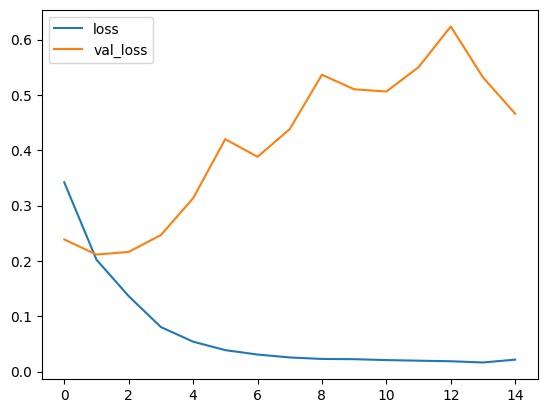

In [47]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

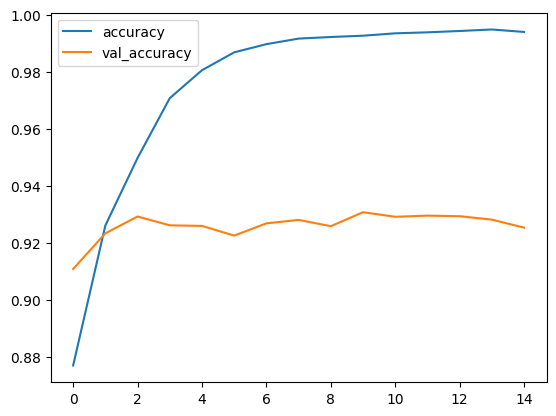

In [49]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## from this we can see that our model is getting overfit with the train data